# Data Processing and Versioning

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
from azureml.core import Workspace, Dataset

In [2]:
# import dataset

df = pd.read_csv('Dataset/weather_dataset_raw.csv')

# 1. Data quality assessment 

In [3]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Weather_conditions
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,rain
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,rain
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,rain
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,NaN
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,rain


In [4]:
df.describe()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,48226.000000,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,27843.727094,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24113.000000,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,48226.000000,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,72339.000000,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,96452.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [5]:
df.shape

(96453, 11)

In [6]:
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

#### Check for missing data

In [7]:
df.isnull().values.any()

True

# 2. Calibrate missing data

In [8]:
df['Weather_conditions'].fillna(method='ffill',inplace=True,axis=0)

In [9]:
df.isnull().values.any()

False

In [10]:
df.Weather_conditions.value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [11]:
df["Weather_conditions"].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

In [12]:
df.Weather_conditions.value_counts()

rain       82271
no_rain    14182
Name: Weather_conditions, dtype: int64

#### Convert Timestamp to Datetime format

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#### Convert text data to numeric using Label Encoding

In [14]:
y = df['Weather_conditions']

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [16]:
y = pd.DataFrame(data=y, columns=["Current_weather_condition"])

In [17]:
df = pd.concat([df, y], axis=1)

In [18]:
df.Current_weather_condition.value_counts()

1    82271
0    14182
Name: Current_weather_condition, dtype: int64

In [19]:
df.drop(['Weather_conditions'],axis=1,inplace=True)

#### Future Weather_condition

In [20]:
df['Future_weather_condition'] = df.Current_weather_condition.shift(4, axis = 0) 

In [21]:
df.dropna(inplace=True)

In [22]:
df['Future_weather_condition'] = df['Future_weather_condition'].apply(np.int64)

In [23]:
# Result - rain is 0 and no_rain is 1
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1,1
5,5,2006-04-01 05:00:00+02:00,"Port of Turku, Finland",9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,1,1
6,6,2006-04-01 06:00:00+02:00,"Port of Turku, Finland",7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,1,1
7,7,2006-04-01 07:00:00+02:00,"Port of Turku, Finland",8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,1,1
8,8,2006-04-01 08:00:00+02:00,"Port of Turku, Finland",10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,1,1


## b) Understanding Correlations between data (columns)

In [24]:
df.corr(method ='pearson')

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
S_No,1.000000,0.025460,0.026591,0.041773,-0.006393,-0.027760,0.109075,0.016650,0.083009,0.082774
Temperature_C,0.025460,1.000000,0.992629,-0.632254,0.008959,0.029995,0.392876,-0.005446,0.378350,0.348167
Apparent_Temperature_C,0.026591,0.992629,1.000000,-0.602570,-0.056646,0.029039,0.381749,-0.000218,0.383877,0.357662
Humidity,0.041773,-0.632254,-0.602570,1.000000,-0.224957,0.000720,-0.369223,0.005451,-0.130966,-0.096626
Wind_speed_kmph,-0.006393,0.008959,-0.056646,-0.224957,1.000000,0.103815,0.100745,-0.049264,0.094135,0.066179
Wind_bearing_degrees,-0.027760,0.029995,0.029039,0.000720,0.103815,1.000000,0.047567,-0.011653,0.059540,0.061013
Visibility_km,0.109075,0.392876,0.381749,-0.369223,0.100745,0.047567,1.000000,0.059815,0.233356,0.227457
Pressure_millibars,0.016650,-0.005446,-0.000218,0.005451,-0.049264,-0.011653,0.059815,1.000000,0.040329,0.038392
Current_weather_condition,0.083009,0.378350,0.383877,-0.130966,0.094135,0.059540,0.233356,0.040329,1.000000,0.808768
Future_weather_condition,0.082774,0.348167,0.357662,-0.096626,0.066179,0.061013,0.227457,0.038392,0.808768,1.000000


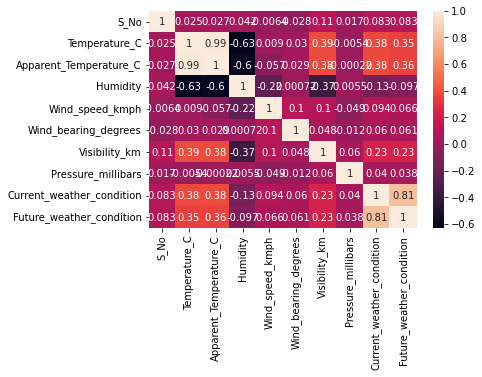

In [25]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [26]:
# Filter or drop irrelevent data columns
df.drop(['S_No', 'Apparent_Temperature_C'],axis=1,inplace=True)

<AxesSubplot:>

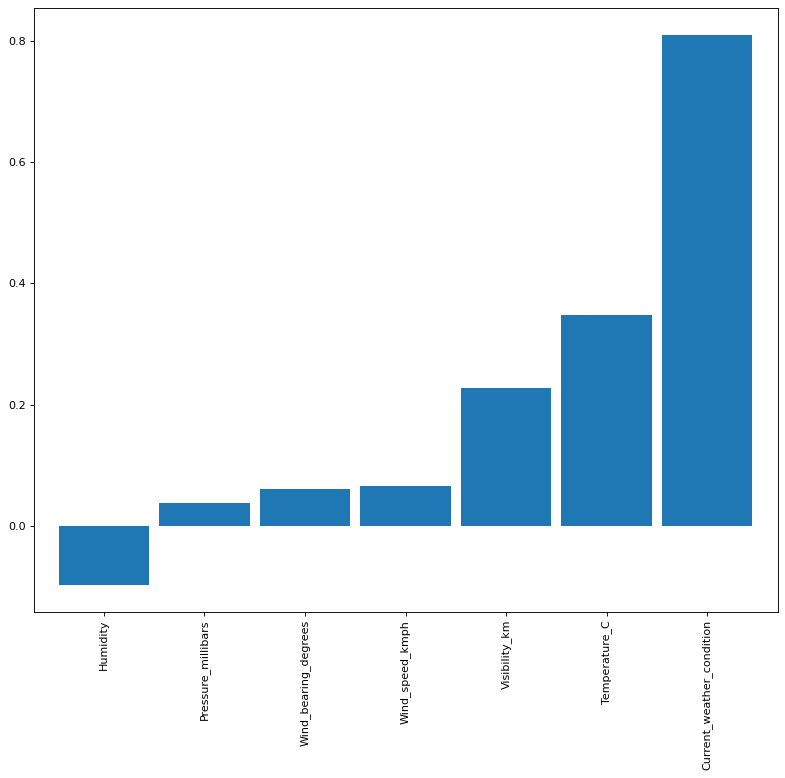

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='w')
df.corr(method ='pearson')['Future_weather_condition'].sort_values(ascending=True).drop(['Future_weather_condition']).plot(kind='bar', width=0.9)

## d) Timeseries analysis of Temperature

In [28]:
time = df['Timestamp']
temp = df['Temperature_C']

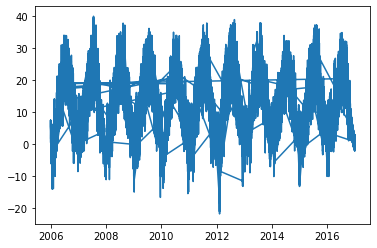

In [29]:
## plot graph
plt.plot(time, temp)
plt.show()

In [30]:
# Save processed dataset 
df.to_csv('Dataset/weather_dataset_processed.csv',index=False)

## Register dataset to the workspace

In [32]:
subscription_id = 'xxxx-xxxx-xxxx-xxxx-xxxx'
resource_group = 'xxxxx'
workspace_name = 'xxxxx'

In [33]:
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [34]:
# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

In [35]:
# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Dataset', target_path='data')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 2 files
Uploading Dataset/weather_dataset_processed.csv
Uploaded Dataset/weather_dataset_processed.csv, 1 files out of an estimated total of 2
Uploading Dataset/weather_dataset_raw.csv
Uploaded Dataset/weather_dataset_raw.csv, 2 files out of an estimated total of 2
Uploaded 2 files


$AZUREML_DATAREFERENCE_27993102adcf490889e88e02bd0b2afc

In [36]:
dataset = Dataset.Tabular.from_delimited_files(datastore.path('data/weather_dataset_processed.csv'))

In [37]:
# preview the first 3 rows of the dataset from datastore
dataset.take(3).to_pandas_dataframe()

,Timestamp,Location,Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition,Future_weather_condition
0,2006-04-01 02:00:00,"Port of Turku, Finland",8.755556,0.83,11.0446,259,15.8263,1016.51,1,1
1,2006-04-01 03:00:00,"Port of Turku, Finland",9.222222,0.85,13.9587,258,14.9569,1016.66,1,1
2,2006-04-01 04:00:00,"Port of Turku, Finland",7.733333,0.95,12.3648,259,9.9820,1016.72,1,1


In [38]:
# Register Dataset to workspace

In [39]:
weather_ds = dataset.register(workspace=workspace,
                                 name='processed_weather_data_portofTurku',
                                 description='processed weather data')